### Задание № 1 Ultra Lite


#### Введение в нейронные сети

Перепишите ноутбук по распознаванию рукописных цифр, восстановив следующие операции:

1. Импорт библиотек.
2. Загрузка базы mnist.
3. Нормирование и преобразование x_train и y_train.
4. Создание нейронной сети.
5. Обучение нейронной сети.


*Можно смотреть в ноутбук с занятия, но код необходимо писать самостоятельно.

#### 1. Импорт библиотек.

In [12]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
%matplotlib inline 

#### 2. Загрузка базы mnist.

In [13]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() 


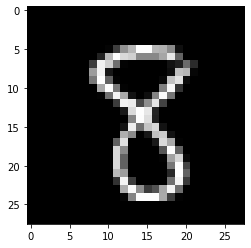

In [14]:
n = 144 #Номер картинки
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB')) #Отрисовка картинки
plt.show() # Вывод картинки

In [15]:
y_train_org[n]

8

#### 3. Нормирование и преобразование x_train и y_train.

In [16]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [17]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float 
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float 
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [18]:
y_train_org[0]

5

In [19]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [20]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(60000, 10)


In [21]:
print(y_train[0]) #Выводим пример одного выходного вектора

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [22]:
print(y_train_org.shape)

(60000,)


In [23]:
print(y_train_org[36])

6


#### 4. Создание нейронной сети.

In [24]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [25]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


#### 5. Обучение нейронной сети.

In [26]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 0.2029 - accuracy: 0.9401
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0749 - accuracy: 0.9770
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0485 - accuracy: 0.9842
Epoch 4/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0329 - accuracy: 0.9890
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0263 - accuracy: 0.9915
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0195 - accuracy: 0.9935
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0199 - accuracy: 0.9938
Epoch 8/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0145 - accuracy: 0.9952
Epoch 9/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0147 - accuracy: 0.9953
Epoch 10/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0114 - accuracy: 0.9959

In [27]:
model.save_weights('model.h5')
model.load_weights('model.h5')

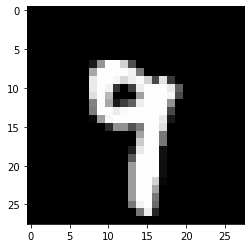

In [28]:
n_rec = 389 #Номер тестовой цифры, которую будем распознавать
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [29]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
print(x.shape)

(784,)


In [30]:
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример

x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [31]:
prediction = model.predict(x) #Распознаём наш пример

In [32]:
print(prediction) #Выводим результат

[[2.6328334e-12 1.5480951e-10 2.1149035e-12 5.4363957e-12 1.2948115e-04
  3.5995991e-11 3.1527794e-15 4.4828575e-06 2.9975855e-10 9.9986601e-01]]


In [33]:
sum(prediction[0])

0.999999973268661

In [34]:
pred = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(pred)

9


In [35]:
print(y_test_org[n_rec]) #выводим правильный ответ, для сравнения

9
